In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [8]:
df=pd.read_csv("customer_segments.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Hierarchical_Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,1


In [9]:
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'KMeans_Cluster', 'Hierarchical_Cluster'],
      dtype='object')


In [13]:
df_selected = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Hierarchical_Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,1,2
198,199,Male,32,137,18,1,1


In [17]:
import warnings
warnings.filterwarnings('ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

results = []
for k in range(2, 6): 
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    silhouette = silhouette_score(X_scaled, labels)
    davies_bouldin = davies_bouldin_score(X_scaled, labels)
    
    results.append([k, silhouette, davies_bouldin])
    print(f"\n🔹 K={k} | Silhouette Score: {silhouette:.3f} | Davies-Bouldin Index: {davies_bouldin:.3f}")


🔹 K=2 | Silhouette Score: 0.335 | Davies-Bouldin Index: 1.261

🔹 K=3 | Silhouette Score: 0.358 | Davies-Bouldin Index: 1.050

🔹 K=4 | Silhouette Score: 0.404 | Davies-Bouldin Index: 0.931

🔹 K=5 | Silhouette Score: 0.417 | Davies-Bouldin Index: 0.875


In [19]:
results_df = pd.DataFrame(results, columns=['Clusters', 'Silhouette Score', 'Davies-Bouldin Index'])
print("\n Clustering Evaluation Results:")
print(results_df)


 Clustering Evaluation Results:
   Clusters  Silhouette Score  Davies-Bouldin Index
0         2          0.335472              1.260682
1         3          0.357793              1.050270
2         4          0.403958              0.930796
3         5          0.416643              0.874551


In [21]:
best_k = results_df.loc[results_df['Silhouette Score'].idxmax(), 'Clusters']
print(f"\n Best K (Optimal Clusters): {best_k}")


 Best K (Optimal Clusters): 5


In [27]:
kmeans_final = KMeans(n_clusters=int(best_k), random_state=42, n_init=10)
df_selected['Cluster'] = kmeans_final.fit_predict(X_scaled)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Hierarchical_Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,1,2
198,199,Male,32,137,18,1,1


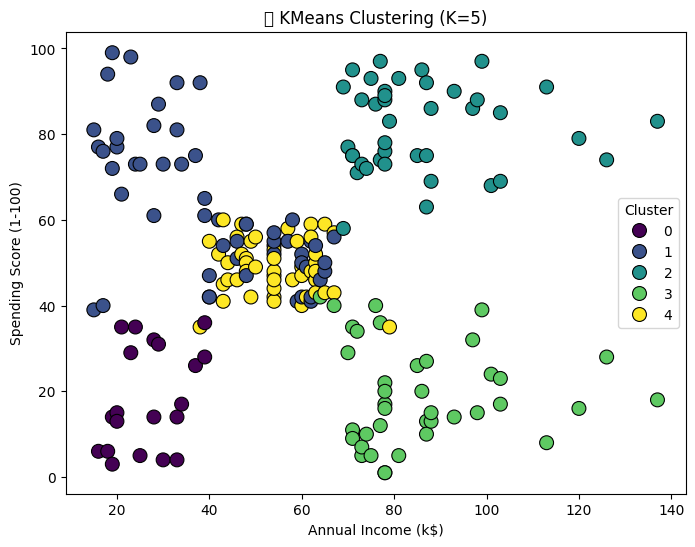

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_selected['Annual Income (k$)'], y=df_selected['Spending Score (1-100)'],hue=df_selected['Cluster'], palette="viridis", s=100, edgecolor="k")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title(f"🔹 KMeans Clustering (K={best_k})")
plt.legend(title="Cluster")
plt.show()